# <span style='font-family:Lato,sans-serif;color:#00fafd;font-size: 1em;'> 735 Pi Data Science - Unstructured Data Final project

<font color='#f5b324'>author</font> João Baiochi  
<font color='#f5b324'>github</font> <a href='https://github.com/baiochi'>@baiochi</a>  

# <a id='imports' style='font-family:Lato,sans-serif;color:#f5b324;font-size: 0.8em;'> Libraries and Configurations

In [1]:
# Supress warnings
import warnings; warnings.filterwarnings('ignore')

# Data and math operations
import re
from math import hypot, atan2, degrees
import numpy as np
import pandas as pd

# Image processing
import cv2
import mediapipe as mp

# Image visualizations
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Audio Speech
import pyttsx3

# For opening images via URL
from PIL.Image import open as open_image
from urllib.request import urlopen

# Display images in Jupyter Notebook
from IPython.display import Image

# OS functions
import os
import time

# Hand and Sign Models
from models import Hand_Detector, Frame_Record

# mediapipe instances
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# Landmark styles
HAND_CONNECTIONS = mp_hands.HAND_CONNECTIONS
DEFAULT_LANDMARK_POINTS = mp_drawing_styles.get_default_hand_landmarks_style()
DEFAULT_LANDMARK_CONNECTIONS = mp_drawing_styles.get_default_hand_connections_style()
BASIC_LANDMARK_POINTS_SPEC = mp_drawing.DrawingSpec(color=(22,150,210), thickness=2, circle_radius=2)
BASIC_LANDMARK_CONNECTION_SPEC = mp_drawing.DrawingSpec(color=(253,191,17), thickness=1, circle_radius=2)
FONT_ARGS = {
	'fontFace' 		: cv2.FONT_HERSHEY_SIMPLEX,
	'fontScale' : 1,
	'color'		: (253, 250, 0),
	'thickness' : 2,
	'lineType'	: cv2.LINE_AA
}

# Terminal ASCII colors
WHITE = '\033[39m'
CYAN = '\033[36m'
GREEN = '\033[32m'
# Draw colors
BLUE = '#00fafd'	# rgb(0,250,253)
YELLOW = '#f5b324'	# rgb(245,179,36)

# <a id='test' style='font-family:Lato,sans-serif;color:#f5b324;font-size: 0.8em;'> Webcam test

In [2]:
# Webcam input
cam = cv2.VideoCapture(0)

hands = mp_hands.Hands(model_complexity=0, min_detection_confidence=0.5, min_tracking_confidence=0.9)

while cam.isOpened():
    success, image = cam.read()
    if not success:
        print("Ignoring empty camera frame.")
        # If loading a video, use 'break' instead of 'continue'.
        continue

    # Improve performance -> False
    image.flags.writeable = False
            
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Hands', cv2.flip(image, 1))
    # Use ESC key to close webcam
    if cv2.waitKey(5) & 0xFF == 27:
        break

# Release video capture
cam.release()
# Memory dump
cv2.destroyAllWindows()
# fix window not closing bug on macOS 10.15
cv2.waitKey(1)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


-1

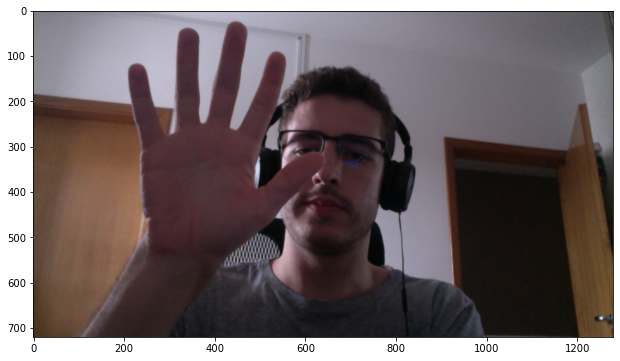

In [3]:
plt.figure(figsize=(12,6))
plt.imshow(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB),1));

In [4]:
hand = Hand_Detector()

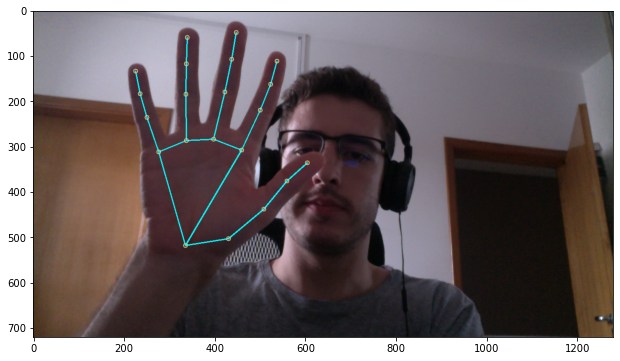

In [5]:
annot_image = hand.find_hands(image.copy())
plt.figure(figsize=(12,6))
plt.imshow(cv2.flip(cv2.cvtColor(annot_image, cv2.COLOR_BGR2RGB),1));

In [6]:
hand.get_hand_map

<bound method Hand_Detector.get_hand_map of <models.Hand_Detector object at 0x7ff202028a60>>

In [7]:
hand.get_connection_angle('PINKY_TIP', 'PINKY_DIP', 'Right')

101.30993247402021

In [8]:
stop

NameError: name 'stop' is not defined

# <a id='record' style='font-family:Lato,sans-serif;color:#f5b324;font-size: 0.8em;'> Record test

In [190]:
def aux_check(result):
	if 'Left' in result.keys():
		df = pd.DataFrame(result['Left'], index=['x','y']).T
		print('Left sum', df.sum())
	if 'Right' in result.keys():
		df = pd.DataFrame(result['Right'], index=['x','y']).T
		print('Right sum', df.sum())

In [200]:
# Create a DataFrame of reference signs (name: str, model: SignModel, distance: int)
reference_signs = 'load_reference_signs(videos)'

# Object that stores mediapipe results and computes sign similarities
frame_record = Frame_Record(pd.DataFrame(), 30)

# Object that draws keypoints & displays results
webcam_manager = 'WebcamManager()'

# Create hand tracking object
hand_tracking = Hand_Detector()

# Turn on the webcam
cam = cv2.VideoCapture(0)

# Set up the Mediapipe environment
while cam.isOpened():

	# Read frame
	_, frame = cam.read()

	# Improve performance -> False
	frame.flags.writeable = False

	# Make detections and draw annotations
	frame = hand_tracking.find_hands(frame)

	# Store results
	current_result = hand_tracking.get_hand_map()
	aux_check(current_result)
	frame_record.process_results(current_result, frame)

	# Update the frame (draw landmarks & display result)
	# webcam_manager.update(frame, results, sign_detected, is_recording)

	# Show imageFlip the image horizontally for a selfie-view display.
	cv2.imshow('MediaPipe Hands', cv2.flip(frame, 1))

	# Key control
	pressed_key = cv2.waitKey(1) & 0xFF
	# Start recording
	if pressed_key == ord('r'):
		frame_record.record(True)
		cv2.putText(frame, 'Recording...', (30, 50), **FONT_ARGS)
	# Stop recording
	elif pressed_key == ord('s'):
		frame_record.record(False)
	# Close webcam
	elif pressed_key == ord('q'):
		frame_record.record(False)
		break

# Release video capture
cam.release()
# Memory dump
cv2.destroyAllWindows()
# fix window not closing bug on macOS 10.15
cv2.waitKey(1)

-1

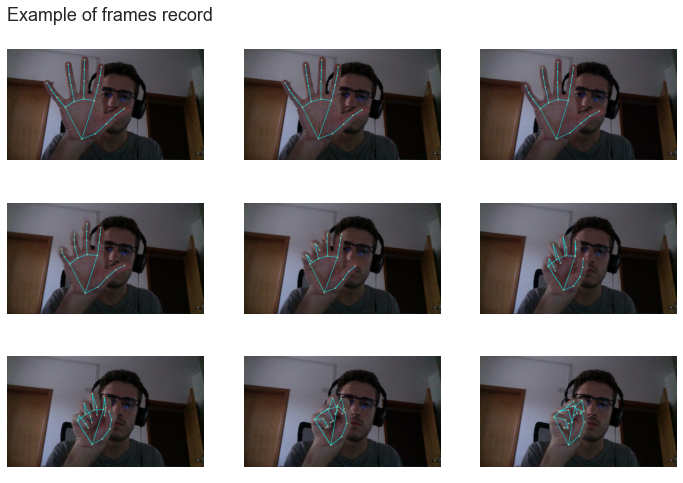

In [202]:
fig = plt.figure(figsize=(12,8))
plt.axis('off')
plt.title('Example of frames record', size=18, pad=20, loc='left')
for i, frame in enumerate(frame_record.recorded_frames[:9:1]):
	fig.add_subplot(3, 3, i+1)
	plt.axis('off')
	plt.imshow(cv2.flip(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB),1));

In [203]:
for num, result in enumerate(frame_record.recorded_results[]):
	print(f'Frame {num+1}')
	if 'Left' in result.keys():
		df = pd.DataFrame(result['Left'], index=['x','y']).T
		print('Left sum', df.sum())
	if 'Right' in result.keys():
		df = pd.DataFrame(result['Right'], index=['x','y']).T
		print('Right sum', df.sum())

Frame 1
Right sum x     9096
y    10851
dtype: int64
Frame 2
Right sum x     9096
y    10851
dtype: int64
Frame 3
Right sum x     9096
y    10851
dtype: int64
Frame 4
Right sum x     9096
y    10851
dtype: int64
Frame 5
Right sum x     9096
y    10851
dtype: int64
Frame 6
Right sum x     9096
y    10851
dtype: int64
Frame 7
Right sum x     9096
y    10851
dtype: int64
Frame 8
Right sum x     9096
y    10851
dtype: int64
Frame 9
Right sum x     9096
y    10851
dtype: int64
Frame 10
Right sum x     9096
y    10851
dtype: int64
Frame 11
Right sum x     9096
y    10851
dtype: int64
Frame 12
Right sum x     9096
y    10851
dtype: int64
Frame 13
Right sum x     9096
y    10851
dtype: int64
Frame 14
Right sum x     9096
y    10851
dtype: int64
Frame 15
Right sum x     9096
y    10851
dtype: int64
Frame 16
Right sum x     9096
y    10851
dtype: int64
Frame 17
Right sum x     9096
y    10851
dtype: int64
Frame 18
Right sum x     9096
y    10851
dtype: int64
Frame 19
Right sum x     9096
y    10

In [210]:
frame_record.recorded_results[0]['Right']
frame_record.recorded_results[16]['Right']

x_df = pd.DataFrame(frame_record.recorded_results[0]['Right'], index=['x','y']).T
y_df = pd.DataFrame(frame_record.recorded_results[16]['Right'], index=['x','y']).T
y_df

,x,y
WRIST,596,675
THUMB_CMC,578,580
THUMB_MCP,524,511
THUMB_IP,449,499
THUMB_TIP,394,513
INDEX_FINGER_MCP,509,423
INDEX_FINGER_PIP,400,430
INDEX_FINGER_DIP,407,472
INDEX_FINGER_TIP,438,488
MIDDLE_FINGER_MCP,483,450


In [211]:
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

# x = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])
# y = np.array([[2,2], [3,3], [4,4]])
x_df = pd.DataFrame(frame_record.recorded_results[0]['Right'], index=['x','y']).T
y_df = pd.DataFrame(frame_record.recorded_results[16]['Right'], index=['x','y']).T

distance, path = fastdtw(x_df, y_df, dist=euclidean)
print(distance)

0.0


# Draft

In [ ]:
#sns.scatterplot(data=frame, x='x', y='y', hue='index', legend = False)

In [ ]:
# multi_frame = pd.DataFrame()
# for num, frame in enumerate(frame_record.recorded_results):
	
# 	new_frame = pd.DataFrame(frame['Left'], index=['x','y']).T.reset_index().iloc[:3,:]
# 	print(new_frame.head())
# 	multi_frame = pd.concat([multi_frame, new_frame], axis=0)
# sns.scatterplot(data=multi_frame, x='x', y='y', hue='index', legend = False)
# multi_frame

In [ ]:
# def format_dataframe(df:pd.DataFrame) -> pd.DataFrame:
# 	new_df = pd.DataFrame()
# 	if 'Left' in df.columns:
# 		new_df[['Left_X','Left_Y']] = pd.DataFrame(df.Left.tolist(), index=df.index)
# 	if 'Right' in df.columns:
# 		new_df[['Right_X','Right_Y']] = pd.DataFrame(df.Right.tolist(), index=df.index)
	
# 	#new_df.columns = pd.MultiIndex.from_product([['Left', 'Right'], ['x', 'y']], names=['Hand', 'Coord'])

# 	return new_df

# test_df = format_dataframe(result_example)

In [130]:
def check_left_right(recorded_results: Frame_Record.recorded_results):
	# Check if both hands detected are the same
	distances = set()
	for result in recorded_results:
		result_df = pd.DataFrame(frame)
		df_sum = (result_df.Left.apply(lambda x: sum(x)) - result_df.Right.apply(lambda x: sum(x))).sum()
		distances.add(df_sum)

	if len(distances) == 1:
		print('Same hand')
	else:
		print('Not the same')

Same hand
